## Supplementary Figure 10

MOA Prediction by dose

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(patchwork))

source("viz_themes.R")
source("plotting_functions.R")
source("data_functions.R")

In [2]:
output_figure_base <- file.path("figures", "supplementary", "supfigure10")
extensions <- c(".png", ".pdf")

In [3]:
performance_dir <- file.path("../2.MOA-prediction/4.model_viz/performance_results")

# From 1.moa_predictions_visualization.ipynb
dose_baseline <- 0.4749651035173523

In [4]:
# Load and process dose results
metrics_dose_file <- file.path(performance_dir, "all_performance_metrics_by_dose.csv")

metrics_dose_cols <- readr::cols(
    id_name = readr::col_character(),
    metrics = readr::col_character(),
    values = readr::col_double(),
    class = readr::col_character(),
    model = readr::col_character(),
    profile_tech = readr::col_character()
)

all_dose_metrics_df <- readr::read_csv(metrics_dose_file, col_types = metrics_dose_cols) %>%
    dplyr::filter(profile_tech != "CP_L1000") %>%
    dplyr::mutate(performance = values * 100)

# Process data
all_dose_metrics_df$profile_tech <- dplyr::recode(
    all_dose_metrics_df$profile_tech,
    cp = "Cell Painting",
    cpsubsample = "Cell Painting (subsample)"
)

all_dose_metrics_df$metrics <- dplyr::recode(all_dose_metrics_df$metrics, pr_auc_score = "Precision-recall")
all_dose_metrics_df$model <- dplyr::recode(
    all_dose_metrics_df$model,
    mlknn = "Ml-KNN", simplenn = "Simple NN", cnn = "1D-CNN", resnet = "ResNet", tabnet = "TabNet"
)

all_dose_metrics_df$model <- factor(
    all_dose_metrics_df$model,
    levels = c("Ml-KNN", "Simple NN", "1D-CNN", "ResNet", "TabNet", "Models Ensemble")
)

all_dose_metrics_df$class <- dplyr::recode(
    all_dose_metrics_df$class,
    dose_1 = dose_order[1],
    dose_2 = dose_order[2],
    dose_3 = dose_order[3],
    dose_4 = dose_order[4],
    dose_5 = dose_order[5],
    dose_6 = dose_order[6]
)
all_dose_metrics_df$class <- factor(all_dose_metrics_df$class, levels = dose_order)

head(all_dose_metrics_df)

id_name,metrics,values,class,model,profile_tech,performance
<chr>,<chr>,<dbl>,<fct>,<fct>,<chr>,<dbl>
moa_dose_cp_mlknn_1,Precision-recall,0.008965180,0.04 uM,Ml-KNN,Cell Painting,0.8965180
moa_dose_cp_resnet_1,Precision-recall,0.025557721,0.04 uM,ResNet,Cell Painting,2.5557721
moa_dose_cp_cnn_1,Precision-recall,0.033818825,0.04 uM,1D-CNN,Cell Painting,3.3818825
moa_dose_cp_tabnet_1,Precision-recall,0.021828458,0.04 uM,TabNet,Cell Painting,2.1828458
moa_dose_cp_simplenn_1,Precision-recall,0.031115193,0.04 uM,Simple NN,Cell Painting,3.1115193
moa_dose_cp_mlknn_2,Precision-recall,0.009875675,0.12 uM,Ml-KNN,Cell Painting,0.9875675


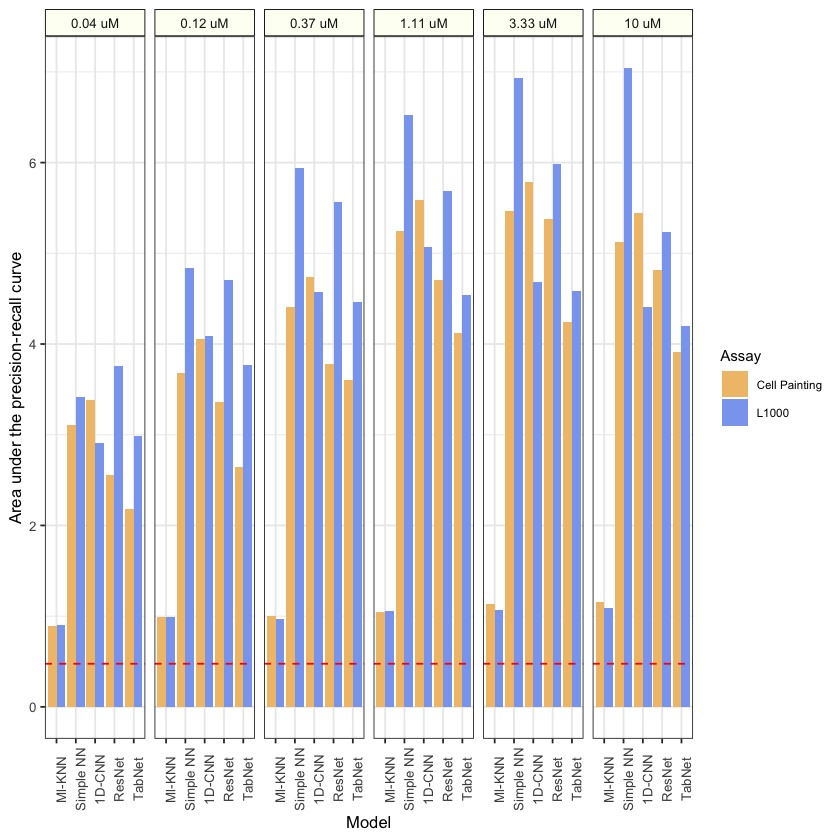

In [5]:
sup_fig_gg <- (
    ggplot(
        all_dose_metrics_df %>% dplyr::filter(profile_tech != "Cell Painting (subsample)"),
        aes(x = model, y = performance))
    + geom_bar(aes(fill = profile_tech), position = "dodge", stat = "identity")
    + facet_grid("~class")
    + figure_theme
    + theme(axis.text.x = element_text(angle=90))
    + scale_fill_manual("Assay", values = assay_colors)
    + xlab("Model")
    + ylab("Area under the precision-recall curve")
    + geom_hline(yintercept=dose_baseline, linetype = "dashed", color = "red")
)

sup_fig_gg

In [6]:
for (extension in extensions) {
    output_file <- paste0(output_figure_base, extension)
    ggplot2::ggsave(output_file, sup_fig_gg, height = 5, width = 9, dpi = 500)
}